In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset
In această secțiune vom încărca și vom vizualiza datele din features.

Vom utiliza framework-ul **pandas**.

In [10]:
featuresFrame = pd.read_csv('../data/features.csv')
gradeFrame = pd.read_csv('../data/grades.csv')
#merge the two dataframes by label
merged = pd.merge(featuresFrame, gradeFrame, on='label')
#drop the label column
merged = merged.drop(['label'], axis=1)
#drop 'Unnamed 22' column
merged = merged.drop(['Unnamed: 22'], axis=1)
#drop nr_crt column
merged = merged.drop(['nr_crt'], axis=1)
#drop row where grade is Nan
merged = merged.dropna()
merged


,nr_clase,nr_errors,nr_inheritance,nr_virtual,nr_static,nr_global,nr_public,nr_private,nr_protected,nr_define,...,nr_stl,nr_namespace,nr_enum,nr_struct,nr_cpp,nr_comments,nr_function,headers_size,sources_size,grade
0,11,605,0,3,2,0,17,1,2,6,...,10,4,0,0,12,4,39,3002,13697,5.01
2,12,1466,9,5,5,0,26,2,0,2,...,6,6,0,0,12,6,28,4497,38762,5.70
3,19,1121,6,3,2,0,31,1,7,19,...,56,19,0,0,20,6,111,12825,31678,5.77
4,26,742,1,1,5,0,35,3,1,3,...,22,3,2,0,25,45,83,6931,19647,5.84
6,18,1357,1,8,4,0,30,1,0,2,...,9,6,0,0,19,3,76,4447,29532,6.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,5,132,0,0,3,0,5,4,1,0,...,21,0,0,0,6,0,18,1979,3577,4.34
71,5,132,0,0,3,0,5,4,1,0,...,21,0,0,0,6,0,18,1979,3577,4.33
72,5,132,0,0,3,0,5,4,1,0,...,21,0,0,0,6,0,18,1979,3577,4.33
73,5,132,0,0,3,0,5,4,1,0,...,21,0,0,0,6,0,18,1979,3577,4.33


In [16]:
print(len(merged.columns))
for i in merged.columns:
    print('item[\''+str(i)+'\'],')

21
item['nr_clase'],
item['nr_errors'],
item['nr_inheritance'],
item['nr_virtual'],
item['nr_static'],
item['nr_global'],
item['nr_public'],
item['nr_private'],
item['nr_protected'],
item['nr_define'],
item['nr_template'],
item['nr_stl'],
item['nr_namespace'],
item['nr_enum'],
item['nr_struct'],
item['nr_cpp'],
item['nr_comments'],
item['nr_function'],
item['headers_size'],
item['sources_size'],
item['grade'],


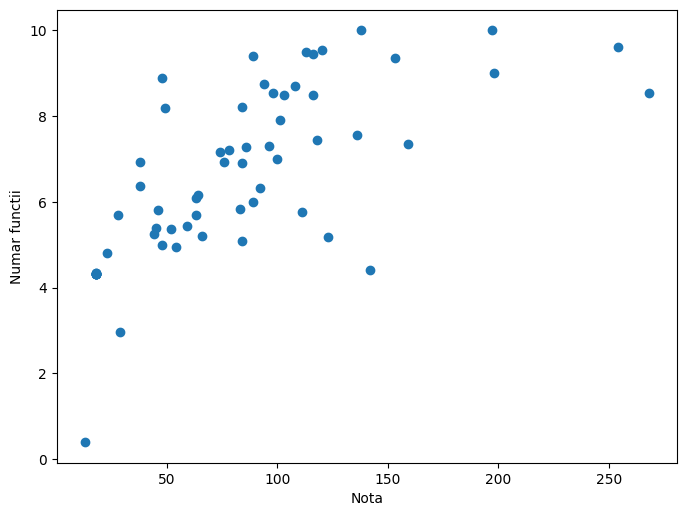

In [6]:
x = merged[1:5000]['nr_function']
y = merged[1:5000]['grade']
plt.figure(figsize=(8,6), dpi=100)
plt.plot(x, y, 'o')
plt.ylabel("Numar functii")
plt.xlabel("Nota")
plt.show()

### Data Split
Impartim datele in date de train si date de test cu ajutorul unei metode in SciKitLearn.

In [8]:
train_frame, test_frame = train_test_split(merged, test_size=0.3)

print('Total: {} \nTrain: {} \nTest: {}'.format(len(merged), len(train_frame), len(test_frame)))

Total: 63 
Train: 44 
Test: 19


### HouseDataset
Definim o clasa HouseDataset care extinde torch.utils.data.Dataset și care implementeaza metodele necesare pentru compatibilitatea cu DataLoader-ul din PyTorch

In [14]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, dataframe):
        self._df = dataframe

    def __len__(self): 
        return len(self._df)

    def __getitem__(self, idx): #[]
        item = self._df.iloc[idx]
        return {'features': torch.tensor([item['nr_clase'],
item['nr_errors'],
item['nr_inheritance'],
item['nr_virtual'],
item['nr_static'],
item['nr_global'],
item['nr_public'],
item['nr_private'],
item['nr_protected'],
item['nr_define'],
item['nr_template'],
item['nr_stl'],
item['nr_namespace'],
item['nr_enum'],
item['nr_struct'],
item['nr_cpp'],
item['nr_comments'],
item['nr_function'],
item['headers_size'],
item['sources_size'],], dtype=torch.float32),
                'labels' : torch.tensor([item['grade']], dtype=torch.float32)}

In [15]:
# Utilizam clasa wrapper House Dataset
train_set = Dataset(train_frame)
test_set = Dataset(test_frame)

# Printam al 5lea sample
train_set[5]

{'features': tensor([1.9000e+01, 5.4100e+02, 0.0000e+00, 8.0000e+00, 1.8000e+01, 0.0000e+00,
         3.3000e+01, 4.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+00, 1.5000e+01,
         2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+01, 2.0000e+00, 4.9000e+01,
         6.8700e+03, 1.6812e+04]),
 'labels': tensor([8.2000])}

## Model
Implementam modelul IA (trebuie sa derivam din torch.nn.Module si sa implementam metodele __init__ si __forward__)

In [ ]:
class RegressionModel(nn.Module):
    def __init__(self, in_feat=1, out_feat=1):
        super().__init__()
        self.fc = nn.Linear(in_feat, out_feat) # Definesc o retea neuronala cu un singur strat Fully Connected

    def forward(self, x):
        out = self.fc(x)
        return out

model = RegressionModel(20,1) # generez o instanță a modelului

## Train

### Hiperparametrii

In [ ]:
LEARNING_RATE = 1e-10 # Rata de invatare
NR_EPOCHS = 5 # Numarul de epoci
BATCH_SIZE = 32 # Numarul de samples dintr-un batch

### Funcția cost (loss)
Vom utiliza Mean Squared Error (torch.nn.MSELoss) 

In [ ]:
criterion = nn.MSELoss() #atentie: turi utilizeaza Root MSE

### Algoritmul de optimizare
Vom utiliza Stochastic Gradient Descent (torch.optim.SGD)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

### Training Loop

In [ ]:
# Pregatim o modalitate de loggare a informatiilor din timpul antrenarii
log_info = []

# Pregatim DataLoader-ul pentru antrenare
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

# Trecem modelul in modul train
model.train() 



########### Training Loop #############

# pentru fiecare epoca (1 epoca = o iteratie peste intregul set de date)
for epoch in range(NR_EPOCHS):
    print('Running epoch {}'.format(epoch))

    epoch_losses = []
    
    # pentru fiecare batch de BATCH_SIZE exemple din setul de date    
    for i, batch in enumerate(train_loader):

        inputs, labels = batch['features'], batch['labels']
        
        # anulam gradientii deja acumulati la nivelul retelei neuronale
        optimizer.zero_grad()

        # FORWARD PASS: trecem inputurile prin retea
        outputs = model(inputs)

        # Calculam LOSSul dintre etichetele prezise si cele reale
        loss = criterion(outputs, labels)

        # BACKPRPAGATION: calculam gradientii propagand LOSSul in retea
        loss.backward()

        # Utilizam optimizorul pentru a modifica parametrii retelei in functie de gradientii acumulati
        optimizer.step()

        # Salvam informatii despre antrenare (in cazul nostru, salvam valoarea LOSS)
        epoch_losses.append(loss.item()) 
    log_info.append((epoch, np.mean(epoch_losses)))

Running epoch 0
Running epoch 1
Running epoch 2
Running epoch 3
Running epoch 4


Realizam graficul modificarii LOSSului pe parcursul antrenării



Text(0, 0.5, 'LOSS')

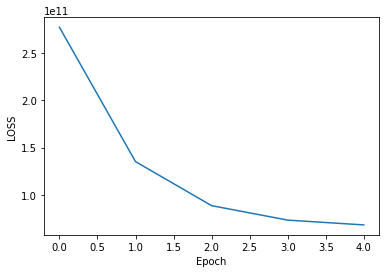

In [ ]:
X = [x for x, loss in log_info]
Y = [loss for x, loss in log_info]
plt.plot(X,Y)
plt.xlabel("Epoch")
plt.ylabel("LOSS")

## Validare / Testare

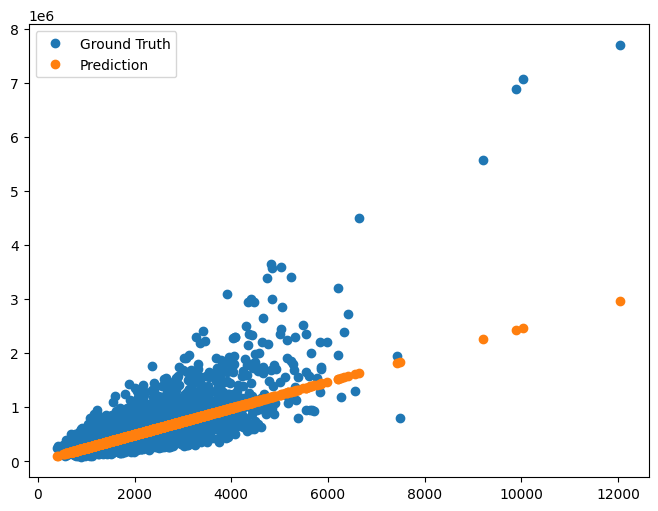

In [ ]:
# Pregatim DataLoader-ul pentru validare
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

# Pregatim o modalitate de stocare a datelor pentru evaluare
eval_outputs = []
true_labels = []
x = []


# Trecem modelul in modul eval
model.eval()



########### Evaluation Loop #############
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch['features'], batch['labels']
        # calculate outputs by running images through the network
        outputs = model(inputs)
        eval_outputs += outputs.squeeze(dim=1).tolist()
        true_labels += labels.squeeze(dim=1).tolist()
        x += inputs.squeeze(dim=1).tolist()

plt.figure(figsize=(8,6), dpi=100)
plt.plot(x, true_labels, 'o', label='Ground Truth')
plt.plot(x, eval_outputs, 'o', label='Prediction')
plt.legend()

In [ ]:
print(model.fc.weight, model.fc.bias)

Parameter containing:
tensor([[245.4669]], requires_grad=True) Parameter containing:
tensor([0.8926], requires_grad=True)
